In [16]:

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib as mlp
from PIL import Image
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures



#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression, LogisticRegression
#from sklearn.svm import SVC
#import pickle


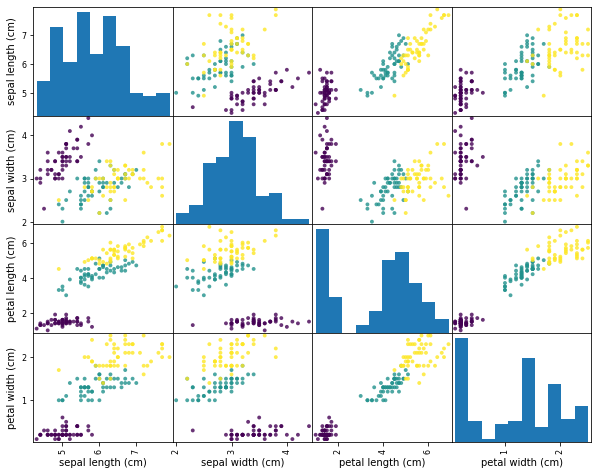

In [17]:
#dataset
iris = datasets.load_iris()

dataframe = pd.DataFrame(iris['data'], columns = iris['feature_names'])

scatter_matrix(dataframe, figsize = (10,8), marker= 'o', s=15, c= iris['target'], alpha=.8)
plt.show()




In [18]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [19]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [20]:
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df['target']= pd.Series(iris['target'], name = 'target values')
df['target_name'] = df['target'].replace([0,1,2],['iris-' + species for species in iris['target_names'].tolist()])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,iris-setosa
1,4.9,3.0,1.4,0.2,0,iris-setosa
2,4.7,3.2,1.3,0.2,0,iris-setosa
3,4.6,3.1,1.5,0.2,0,iris-setosa
4,5.0,3.6,1.4,0.2,0,iris-setosa


In [21]:
df['sepal width (cm)'].max()

4.4

In [22]:
df.groupby(['target_name']).count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
target_name,,,,,
iris-setosa,50,50,50,50,50
iris-versicolor,50,50,50,50,50
iris-virginica,50,50,50,50,50


In [23]:
X = iris.data
y = iris.target

#X = iris["data"][:,(2,3)] #petal length, petal width
#y = iris["target"]


In [24]:
#setosa_or_versicolor = (y==0)|(y==1)
#X = X[setosa_or_versicolor]
#y = y[setosa_or_versicolor]

In [25]:
#separar los datos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print(len(X_train),"train +", len(X_test), "test")

#para todos
#X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_c,y_c, test_size=0.2, random_state=42)
#print(len(X_train_all),"train +", len(X_test_all), "test")

#lin_reg = LinearRegression()
#log_reg = LogisticRegression()
#svc_m = SVC()

112 train + 38 test


In [26]:
X_train[0]

array([5. , 3.6, 1.4, 0.2])

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

iris_pipeline = Pipeline([("std_scaler", StandardScaler())])

In [28]:
X_train_tr = iris_pipeline.fit_transform(X_train) #only 2 clases
#X_train_tr = iris_pipeline.fit_transform(X_train_all)

In [29]:
from joblib import dump
dump(iris_pipeline, "iris_pipeline.sav")

['iris_pipeline.sav']

In [30]:
X_train_tr.shape

(112, 4)

In [31]:
X_train_tr[0]

array([-1.01827123,  1.2864604 , -1.39338902, -1.3621769 ])

# logistic regression

In [32]:
#entrenar modelos

#lin_regr = lin_reg.fit(x_train, y_train)
#log_regr = log_reg.fit(x_train, y_train)
#svc_mo = svc_m(x_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {"solver": ["liblinear"], "penalty": ["l1", "l2"], "C": np.logspace(-3,3,7)}

logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg,param_grid, cv = 10)
logreg_cv.fit(X_train_tr,y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [33]:
Log_tunned = logreg_cv.best_estimator_
Log_tunned

LogisticRegression(C=10.0, penalty='l1', solver='liblinear')

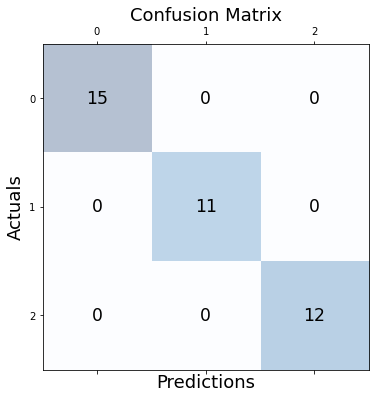

In [34]:
#CONFUSION MATRIX

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


X_test_transformed = iris_pipeline.fit_transform(X_test)
Log_tunned_prediction = Log_tunned.predict(X_test_transformed)

# Calculate the confusion matrix
LOG_CM = confusion_matrix(y_test, Log_tunned_prediction)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(LOG_CM, cmap=plt.cm.Blues, alpha=0.3)
for i in range(LOG_CM.shape[0]):
    for j in range(LOG_CM.shape[1]):
        ax.text(x=j, y=i,s=LOG_CM[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [35]:
print("accurancy", logreg_cv.best_score_)

accurancy 0.928030303030303


In [36]:
log_reg_fmodel = logreg_cv.best_estimator_
X_test_tr_log = iris_pipeline.fit_transform(X_test)
final_prediction_log = log_reg_fmodel.predict(X_test_tr_log)

In [37]:
final_prediction_log

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [38]:
logreg_cv_predictions = logreg_cv.predict(X_test_tr_log)
  
# print classification report
print(classification_report(y_test, logreg_cv_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [39]:
dump(log_reg_fmodel, "log_regression.sav")

['log_regression.sav']

# svm

In [40]:
from sklearn.svm import SVC
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

SVC = SVC()

SVC_cv = GridSearchCV(SVC, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
SVC_cv.fit(X_train_tr, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.957 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.826 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.955 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.826 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.783 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.955 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.348 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [41]:
SVC_tunned = SVC_cv.best_estimator_

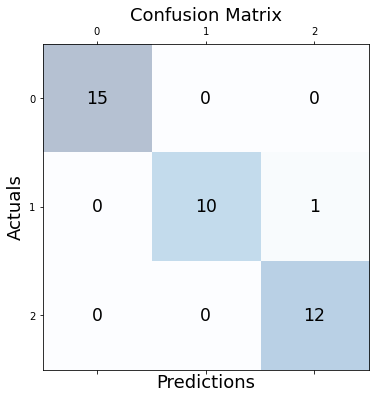

In [42]:
#CONFUSION MATRIX

X_test_transformed = iris_pipeline.fit_transform(X_test)
SVC_tunned_prediction = SVC_tunned.predict(X_test_transformed)

# Calculate the confusion matrix
SVC_CM = confusion_matrix(y_test, SVC_tunned_prediction)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(SVC_CM, cmap=plt.cm.Blues, alpha=0.3)
for i in range(SVC_CM.shape[0]):
    for j in range(SVC_CM.shape[1]):
        ax.text(x=j, y=i,s=SVC_CM[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [43]:
print("accurancy", SVC_cv.best_score_)

accurancy 0.9549407114624506


In [44]:
SVC_fmodel = SVC_cv.best_estimator_
X_test_tr_svc = iris_pipeline.fit_transform(X_test)
final_prediction_svc = SVC_fmodel.predict(X_test_tr_svc)

In [45]:
final_prediction_svc

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [46]:
svc_cv_predictions = SVC_cv.predict(X_test_tr_svc)
  
# print classification report
print(classification_report(y_test, svc_cv_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [47]:
dump(SVC_fmodel, "SVC.sav")

['SVC.sav']

# decision tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

# Definir los parámetros para buscar con la técnica de búsqueda en cuadrícula
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 1, 2, 3, 4, 5],
              'min_samples_split': [2, 3, 4, 5]}

# Definir la técnica de búsqueda en cuadrícula
tree_cv = GridSearchCV(tree, param_grid=param_grid, cv=5)

# Ajustar el modelo con la técnica de búsqueda en cuadrícula
tree_cv.fit(X_train_tr, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]})

In [49]:
tree_tunned = tree_cv.best_estimator_
tree_tunned

DecisionTreeClassifier()

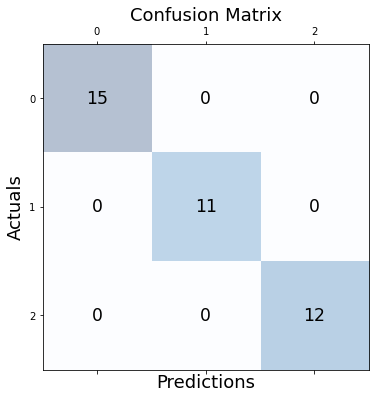

In [50]:
#CONFUSION MATRIX

X_test_transformed = iris_pipeline.fit_transform(X_test)
tree_tunned_prediction = tree_tunned.predict(X_test_transformed)

# Calculate the confusion matrix
tree_CM = confusion_matrix(y_test, tree_tunned_prediction)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(tree_CM, cmap=plt.cm.Blues, alpha=0.3)
for i in range(tree_CM.shape[0]):
    for j in range(tree_CM.shape[1]):
        ax.text(x=j, y=i,s=tree_CM[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [51]:
print("accurancy", tree_cv.best_score_)

accurancy 0.9371541501976285


In [52]:
tree_fmodel = tree_cv.best_estimator_
X_test_tr_tree = iris_pipeline.fit_transform(X_test)
final_prediction_tree = tree_fmodel.predict(X_test_tr_tree)

In [53]:
final_prediction_tree

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [54]:
tree_cv_predictions = tree_cv.predict(X_test_tr_tree)
  
# print classification report
print(classification_report(y_test, tree_cv_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [55]:
dump(tree_fmodel, "tree.sav")

['tree.sav']

# Voting Classifier

In [56]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# Creamos los modelos individuales
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svc = make_pipeline(StandardScaler(), SVC())

# Creamos el VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('svc', svc)], voting='hard')

# Entrenamos el VotingClassifier
voting_clf.fit(X_train, y_train)

# Hacemos predicciones con el VotingClassifier
y_pred = voting_clf.predict(X_test)

In [57]:
accuracy = accuracy_score(y_test, y_pred)
print("Voting Classifier Accuracy: ", accuracy)

Voting Classifier Accuracy:  1.0


In [58]:
# Print out the classification report
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [59]:
dump(voting_clf, 'voting.sav')

['voting.sav']

# Perceptron

In [60]:
from sklearn.linear_model import Perceptron

#y = (Iris.target = 0).astype(np.int)
X_train_transformed = iris_pipeline.fit_transform(X_train)

per_clf = Perceptron()
per_clf.fit(X_train_transformed, y_train)

y_pred = per_clf.predict(X_train_transformed)

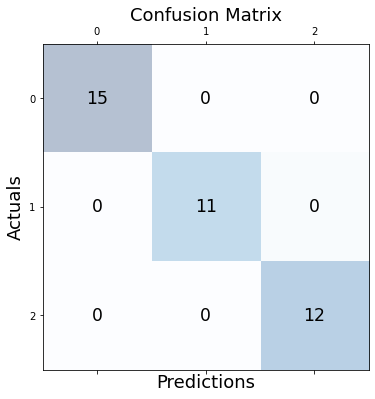

In [62]:
#CONFUSION MATRIX

X_test_transformed = iris_pipeline.fit_transform(X_test)
per_clf_prediction = per_clf.predict(X_test_transformed)

# Calculate the confusion matrix
perceptron_CM = confusion_matrix(y_test, per_clf_prediction)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(perceptron_CM, cmap=plt.cm.Blues, alpha=0.3)
for i in range(tree_CM.shape[0]):
    for j in range(tree_CM.shape[1]):
        ax.text(x=j, y=i,s=tree_CM[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [63]:
# print classification report
print(classification_report(y_test, per_clf_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [61]:
#.sav para el perceptron
dump(per_clf, 'perceptron.sav')

['perceptron.sav']